In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

In [2]:
file_path = '/content/SAMSUNG.csv'

# Đọc dữ liệu từ file CSV
df = pd.read_csv(file_path, index_col='Date', parse_dates=True)

In [3]:
df

,Close,Open,High,Low
Date,,,,
2019-03-01,44387.5,44500.0,45112.5,44012.5
2019-03-02,44387.5,44500.0,45112.5,44012.5
2019-03-03,44387.5,44500.0,45112.5,44012.5
2019-03-04,44850.0,46000.0,46100.0,44800.0
2019-03-05,44250.0,44600.0,45100.0,44150.0
...,...,...,...,...
2024-05-28,77600.0,76500.0,78000.0,76200.0
2024-05-29,75200.0,77700.0,78200.0,75200.0
2024-05-30,73500.0,74800.0,75200.0,73500.0


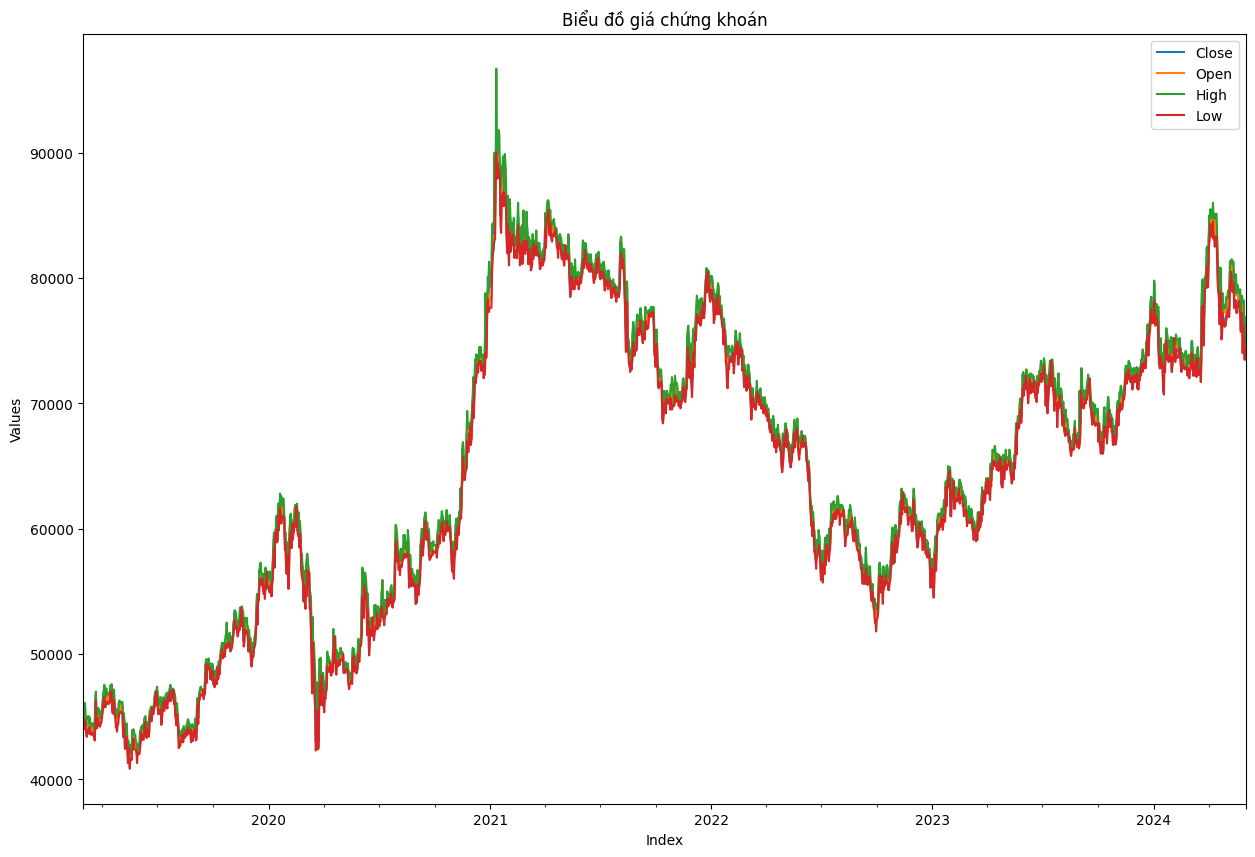

In [4]:

plt.rcParams["figure.figsize"] = [15, 10]

# Thực hiện vẽ biểu đồ
df.plot()
plt.title('Biểu đồ giá chứng khoán')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend(loc='best')
plt.show()

In [5]:
# Định nghĩa hàm kiểm tra tính dừng
def check_stationarity(data):
    for col in data.columns:
        result = adfuller(data[col])
        print(f'Kiểm tra tính dừng cho cột {col}:')
        print(f'ADF Statistic: {result[0]}')
        print(f'p-value: {result[1]}')
        print(f'Critical Values:')
        for key, value in result[4].items():
            print(f'   {key}: {value}')
        print(f'==> {"Không phải" if result[1] > 0.05 else "Là"} chuỗi dừng\n')

# Gọi hàm kiểm tra tính dừng với DataFrame của bạn
check_stationarity(df)

Kiểm tra tính dừng cho cột Close:
ADF Statistic: -1.8322087774440814
p-value: 0.3645921953030643
Critical Values:
   1%: -3.433772946369569
   5%: -2.8630520356606137
   10%: -2.567574949489954
==> Không phải chuỗi dừng

Kiểm tra tính dừng cho cột Open:
ADF Statistic: -1.7624397543242178
p-value: 0.3992622118476888
Critical Values:
   1%: -3.4337711555892523
   5%: -2.8630512450631986
   10%: -2.567574528530358
==> Không phải chuỗi dừng

Kiểm tra tính dừng cho cột High:
ADF Statistic: -1.7866787602620005
p-value: 0.38709508686169447
Critical Values:
   1%: -3.433807330975515
   5%: -2.8630672157562103
   10%: -2.567583032262165
==> Không phải chuỗi dừng

Kiểm tra tính dừng cho cột Low:
ADF Statistic: -1.9234587110577184
p-value: 0.32110712996764784
Critical Values:
   1%: -3.4337891481553133
   5%: -2.8630591884371612
   10%: -2.5675787580436586
==> Không phải chuỗi dừng



In [6]:
from sklearn.model_selection import train_test_split

# chia bộ dữ liệu theo tỉ lệ 6:4
train, test = train_test_split(df, test_size=0.4, shuffle=False)

# dùng diff để chuyển đổi bộ dữ liệu
train_diff = train.diff()
train_diff.dropna(inplace = True)

In [7]:
# Định nghĩa hàm kiểm tra tính dừng
def check_stationarity(data):
    for col in data.columns:
        result = adfuller(data[col])
        print(f'Kiểm tra tính dừng cho cột {col}:')
        print(f'ADF Statistic: {result[0]}')
        print(f'p-value: {result[1]}')
        print(f'Critical Values:')
        for key, value in result[4].items():
            print(f'   {key}: {value}')
        print(f'==> {"Không phải" if result[1] > 0.05 else "Là"} chuỗi dừng\n')

# Gọi hàm kiểm tra tính dừng với DataFrame của bạn
check_stationarity(train_diff)

Kiểm tra tính dừng cho cột Close:
ADF Statistic: -29.187453144748034
p-value: 0.0
Critical Values:
   1%: -3.4360540638753405
   5%: -2.864058725215095
   10%: -2.568111031100567
==> Là chuỗi dừng

Kiểm tra tính dừng cho cột Open:
ADF Statistic: -17.94645496886879
p-value: 2.8486313151597285e-30
Critical Values:
   1%: -3.436064032324827
   5%: -2.864063122757945
   10%: -2.5681133731450605
==> Là chuỗi dừng

Kiểm tra tính dừng cho cột High:
ADF Statistic: -6.0714193894335775
p-value: 1.148421866920585e-07
Critical Values:
   1%: -3.4361604996756685
   5%: -2.864105678204421
   10%: -2.568136037454102
==> Là chuỗi dừng

Kiểm tra tính dừng cho cột Low:
ADF Statistic: -12.076712226457268
p-value: 2.2812740804416513e-22
Critical Values:
   1%: -3.4360840741163168
   5%: -2.864071964072552
   10%: -2.568118081861596
==> Là chuỗi dừng



In [8]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.5 MB/s eta 0:00:00


In [9]:
from pmdarima import auto_arima
import pandas as pd
pq = []
for column in train_diff:
    print(f'Cột : {column}')
    stepwise_model = auto_arima(train_diff[column],start_p=1, start_q=1,max_p=5, max_q=5, seasonal=False,
        trace=True,error_action='ignore',suppress_warnings=True, stepwise=True,maxiter=1000)

    parameter = stepwise_model.get_params().get('order')
    print(f'bậc tối ưu cho cột:{column} là: {parameter} \n\n')
    pq.append(stepwise_model.get_params().get('order'))

Cột : Close
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=19032.230, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19078.756, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=19038.711, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=19031.135, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=19031.472, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=19030.263, Time=0.46 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=19025.581, Time=0.65 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=19027.611, Time=0.29 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=19027.396, Time=1.28 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=19027.147, Time=1.13 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=19025.181, Time=0.60 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=19024.745, Time=0.39 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=19025.447, Time=0.24 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=19027.207, Time=1.59 sec
 ARIMA(

In [10]:
pq

[(0, 0, 3), (0, 0, 2), (2, 0, 3), (4, 0, 0)]

In [11]:
def inverse_diff(actual_df, pred_df):
    df_res = pred_df.copy()
    columns = actual_df.columns
    for col in columns:
        df_res[str(col)+'_1st_inv_diff'] = actual_df[col].iloc[-1] + df_res[str(col)].cumsum()
    return df_res

In [12]:
df_results_grid = pd.DataFrame(columns=['p', 'q', 'RMSE Open', 'RMSE High', 'RMSE Low', 'RMSE Close'])

for i in pq:
    if i[0] == 0 and i[2] == 0:
        pass
    else:
        print(f'Running for {i}')
        model = VARMAX(train_diff, order=(i[0], i[2])).fit()
        result = model.forecast(steps=len(test))
        inv_res = inverse_diff(df, result)
        Opensrmse = np.sqrt(metrics.mean_squared_error(test['Open'], inv_res.Open_1st_inv_diff))
        Highrmse = np.sqrt(metrics.mean_squared_error(test['High'], inv_res.High_1st_inv_diff))
        Lowrmse = np.sqrt(metrics.mean_squared_error(test['Low'], inv_res.Low_1st_inv_diff))
        Closermse = np.sqrt(metrics.mean_squared_error(test['Close'], inv_res.Close_1st_inv_diff))

        new_row = {'p': i[0], 'q': i[2], 'RMSE Open': Opensrmse, 'RMSE High': Highrmse, 'RMSE Low': Lowrmse, 'RMSE Close': Closermse}
        df_results_grid = pd.concat([df_results_grid, pd.DataFrame([new_row])], ignore_index=True)



Running for (0, 0, 3)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Running for (0, 0, 2)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Running for (2, 0, 3)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Running for (4, 0, 0)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [13]:
df_results_grid.sort_values(by = ['RMSE Open','RMSE High','RMSE Low','RMSE Close'] )

,p,q,RMSE Open,RMSE High,RMSE Low,RMSE Close
3,4,0,16500.307733,17158.977932,15928.944838,16490.846984
0,0,3,16613.885667,17340.180125,15918.836125,16593.758031
1,0,2,16935.733676,17672.901724,16039.698262,16758.948837
2,2,3,16953.860709,17676.669827,16120.903357,16818.919096


In [14]:
best_p = df_results_grid.loc[0, 'p']
best_q = df_results_grid.loc[0, 'q']

model = VARMAX(train_diff, order=(best_p, best_q))
results = model.fit()

print(f'p: {best_p}, q: {best_q}')
print(results.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 0, q: 3
                                  Statespace Model Results                                  
Dep. Variable:     ['Close', 'Open', 'High', 'Low']   No. Observations:                 1151
Model:                                       VMA(3)   Log Likelihood              -35241.066
                                        + intercept   AIC                          70606.133
Date:                              Thu, 20 Jun 2024   BIC                          70919.133
Time:                                      04:44:28   HQIC                         70724.280
Sample:                                  03-02-2019                                         
                                       - 04-25-2022                                         
Covariance Type:                                opg                                         
Ljung-Box (L1) (Q):     5.37, 62.57, 25.37, 62.54   Jarque-Bera (JB):   455.88, 261.00, 14804.41, 2164.41
Prob(Q):                   0.02, 0.00, 0.00, 0

In [15]:
predict = results.get_prediction(start = len(train), end = len(train) + len(test) - 1)
predicts = predict.predicted_mean

In [16]:
predicts.columns = ['Open_predicted', 'High_predicted', 'Low_predicted', 'Close_predicted']
predicts['Date'] = test.index
predicts
predicts_date = predicts.set_index('Date')
predicts_date

,Open_predicted,High_predicted,Low_predicted,Close_predicted
Date,,,,
2022-04-26,28.612091,64.942600,11.662733,45.938912
2022-04-27,-57.345785,-37.399752,-87.952671,-52.048188
2022-04-28,19.037519,19.202961,18.755503,19.361544
2022-04-29,19.037519,19.202961,18.755503,19.361544
2022-04-30,19.037519,19.202961,18.755503,19.361544
...,...,...,...,...
2024-05-28,19.037519,19.202961,18.755503,19.361544
2024-05-29,19.037519,19.202961,18.755503,19.361544
2024-05-30,19.037519,19.202961,18.755503,19.361544


In [17]:
# Lấy giá trị cuối cùng của dữ liệu gốc trước khi diff
last_original_values = df.iloc[-len(test) - 1]
# Tạo một DataFrame để chứa các giá trị dự đoán gốc
forecast_data = pd.DataFrame(columns=['Open', 'High', 'Low', 'Close'], index=test.index)

# Khởi tạo giá trị bắt đầu với giá trị cuối cùng của dữ liệu gốc
current_values = last_original_values.copy()

# Thực hiện inverse differencing cho từng ngày dự đoán
for index, row in predicts_date.iterrows():
    current_values['Open'] += row['Open_predicted']
    current_values['High'] += row['High_predicted']
    current_values['Low'] += row['Low_predicted']
    current_values['Close'] += row['Close_predicted']
    # Thêm giá trị hiện tại vào DataFrame kết quả
    forecast_data.loc[index] = current_values

In [18]:


# Tính toán MAPE và RMSE
mape = mean_absolute_percentage_error(test, predicts_date)
rmse = np.sqrt(mean_squared_error(test, predicts_date))
mse = mean_squared_error(test, predicts_date)

print(f'RMSE: {rmse:.4f}')
print(f'MSE: {mse:.4f}')
print(f'MAPE: {mape:.4f}')

results_VARMA = pd.DataFrame([['VARMA', mape, mse, rmse]],
               columns = ['Model', 'RMSE', 'MSE', 'MAPE'])
results_VARMA

RMSE: 67316.4786
MSE: 4531508284.8006
MAPE: 0.9997


,Model,RMSE,MSE,MAPE
0,VARMA,0.999713,4.531508e+09,67316.478553


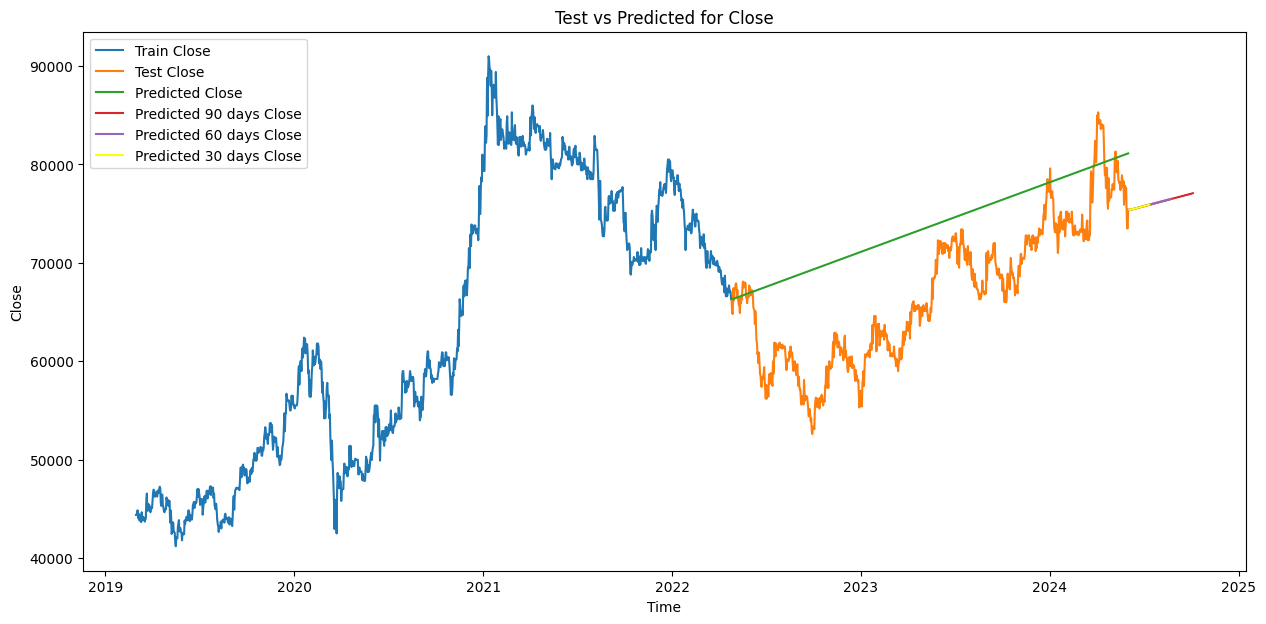

In [19]:
last_original_values_afterPredict = df.iloc[len(df) - 1]  # Adjust this as per your data

# Function to forecast and inverse differencing for given days
def forecast_and_inverse_diff(forecast_days):
    forecast_data = pd.DataFrame(columns=['Open', 'High', 'Low', 'Close'])
    current_values = last_original_values_afterPredict.copy()

    future_dates = pd.date_range(start=test.index[-1] + pd.Timedelta(days=1), periods=forecast_days, freq='B')
    future_predict = results.get_forecast(steps=forecast_days)
    future_predicts = future_predict.predicted_mean
    future_predicts.columns = ['Open_predicted', 'High_predicted', 'Low_predicted', 'Close_predicted']
    future_predicts['Date'] = future_dates
    future_predicts_date = future_predicts.set_index('Date')

    for index, row in future_predicts_date.iterrows():
        current_values['Open'] += row['Open_predicted']
        current_values['High'] += row['High_predicted']
        current_values['Low'] += row['Low_predicted']
        current_values['Close'] += row['Close_predicted']
        forecast_data.loc[index] = current_values.copy()

    return forecast_data

# Forecast for 30, 60, and 90 days
forecast_data_30days = forecast_and_inverse_diff(30)
forecast_data_60days = forecast_and_inverse_diff(60)
forecast_data_90days = forecast_and_inverse_diff(90)

# Plotting
for col in ['Close']:
    plt.figure(figsize=(15, 7))
    plt.plot(train.index, train[col], label=f'Train {col}')
    plt.plot(test.index, test[col], label=f'Test {col}')
    plt.plot(forecast_data.index, forecast_data[col], label=f'Predicted {col}')
    plt.plot(forecast_data_90days.index, forecast_data_90days[col], label=f'Predicted 90 days {col}')
    plt.plot(forecast_data_60days.index, forecast_data_60days[col], label=f'Predicted 60 days {col}')
    plt.plot(forecast_data_30days.index, forecast_data_30days[col], label=f'Predicted 30 days {col}', color = "yellow")
    plt.title(f'Test vs Predicted for {col}')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.legend()
    plt.show()